In [1]:
from lib.utils import get_train_split_data, load_all_resale_data, get_cleaned_normalized_data
from lib.eval import get_regression_metrics

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Configuration
RANDOM_STATE = 42
TEST_SIZE = 0.2
HIDDEN_LAYER_SIZES = (64, 32)
MAX_ITER = 200

In [3]:
X, y = load_all_resale_data()

X, y = get_cleaned_normalized_data(X, y)

# Split data
print(f"Splitting data with test size {TEST_SIZE}...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

Loading data from c:\users\wzaww\projects\nus-cs3244-assignment1\scripts\lib\../data\Resale Flat Prices (Based on Approval Date), 1990 - 1999.csv...
Loading data from c:\users\wzaww\projects\nus-cs3244-assignment1\scripts\lib\../data\Resale Flat Prices (Based on Approval Date), 2000 - Feb 2012.csv...
Loading data from c:\users\wzaww\projects\nus-cs3244-assignment1\scripts\lib\../data\Resale Flat Prices (Based on Registration Date), From Mar 2012 to Dec 2014.csv...
Loading data from c:\users\wzaww\projects\nus-cs3244-assignment1\scripts\lib\../data\Resale Flat Prices (Based on Registration Date), From Jan 2015 to Dec 2016.csv...
Loading data from c:\users\wzaww\projects\nus-cs3244-assignment1\scripts\lib\../data\Resale flat prices based on registration date from Jan-2017 onwards.csv...
Combined dataset shape: (948962, 11)
Features shape: (948962, 10)
Target shape: (948962,)
Selected features: month, town, flat_type, block, street_name, storey_range, floor_area_sqm, flat_model, lease_com

In [4]:
# Initialize model
print("Initializing MLPRegressor...")
model = MLPRegressor(
    hidden_layer_sizes=HIDDEN_LAYER_SIZES,
    max_iter=MAX_ITER,
    random_state=RANDOM_STATE,
    early_stopping=True,
    validation_fraction=0.1,
    verbose=True
)

Initializing MLPRegressor...


In [5]:
# Train model
print("Training neural network...")
model.fit(X_train, y_train)

Training neural network...
Iteration 1, loss = 37084142612.71110535
Validation score: 0.390959
Iteration 2, loss = 7750161541.05658340
Validation score: 0.598790
Iteration 3, loss = 5269862732.15327168
Validation score: 0.720369
Iteration 4, loss = 3739920786.93520308
Validation score: 0.798554
Iteration 5, loss = 2811169602.57011175
Validation score: 0.839735
Iteration 6, loss = 2370778251.22041082
Validation score: 0.857469
Iteration 7, loss = 2177957641.92588425
Validation score: 0.865564
Iteration 8, loss = 2079518602.20567846
Validation score: 0.870304
Iteration 9, loss = 2021265305.23664689
Validation score: 0.873024
Iteration 10, loss = 1984089301.87786460
Validation score: 0.875039
Iteration 11, loss = 1954657343.25633192
Validation score: 0.876678
Iteration 12, loss = 1926271880.19225192
Validation score: 0.878649
Iteration 13, loss = 1895431348.93314481
Validation score: 0.880599
Iteration 14, loss = 1862776970.76526165
Validation score: 0.882781
Iteration 15, loss = 18264197

MLPRegressor(early_stopping=True, hidden_layer_sizes=(64, 32), random_state=42,
             verbose=True)

In [6]:
# Make predictions
print("Making predictions...")
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

Making predictions...


In [7]:
# Evaluate
print("\nTraining Performance:")
print(f"- MSE: {mean_squared_error(y_train, train_preds):.4f}")
print(f"- MAE: {mean_absolute_error(y_train, train_preds):.4f}")
print(f"- R²: {r2_score(y_train, train_preds):.4f}")

print("\nTest Performance:")
print(f"- MSE: {mean_squared_error(y_test, test_preds):.4f}")
print(f"- MAE: {mean_absolute_error(y_test, test_preds):.4f}")
print(f"- R²: {r2_score(y_test, test_preds):.4f}")


Training Performance:
- MSE: 977491175.8961
- MAE: 21198.6633
- R²: 0.9689

Test Performance:
- MSE: 1052088533.2938
- MAE: 22090.5652
- R²: 0.9665


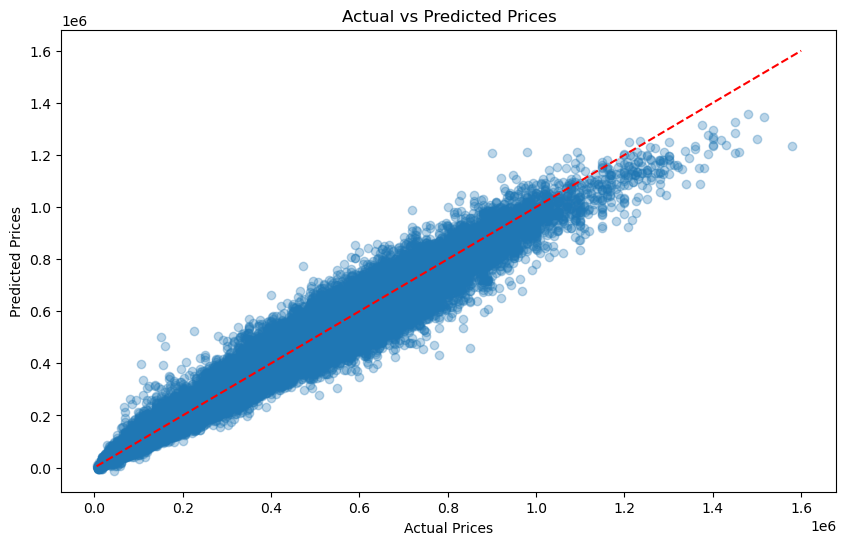

In [8]:
# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_preds, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()